In [1]:
import pandas as pd
df= pd.read_csv("/Users/main/Desktop/chatbot 2/data/todos_restaurantes.csv",index_col=0)

In [2]:
import os
from dotenv import load_dotenv
import warnings
from langchain_openai import ChatOpenAI
load_dotenv()

warnings.filterwarnings("ignore")
OPEN_AI_API_KEY = os.getenv("OPEN_AI_API_KEY")

In [3]:
# llm = ChatOpenAI(
#     model="gpt-3.5-turbo",
#     temperature=1,
#     model_name="amiguis")

In [7]:
import time
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma

# Initialize the embedding function
embedding_function = OpenAIEmbeddings()

# Load the CSV file
loader = CSVLoader("/Users/main/Desktop/chatbot 2/data/todos_restaurantes.csv")
documents = loader.load()

# Split documents into smaller chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
split_documents = text_splitter.split_documents(documents)

# Batch the document processing
batch_size = 100  # Adjust this to stay within token limits
batches = [split_documents[i:i + batch_size] for i in range(0, len(split_documents), batch_size)]

# Create Chroma vector store incrementally
db = None
for i, batch in enumerate(batches):
    print(f"Processing batch {i + 1}/{len(batches)}...")
    if db is None:
        db = Chroma.from_documents(batch, embedding_function)
    else:
        db.add_documents(batch)
    
    # Add a delay to avoid exceeding TPM limits
    time.sleep(60)  # Adjust based on your organization's rate limits

# Create a retriever
retriever = db.as_retriever()

Processing batch 1/43...
Processing batch 2/43...
Processing batch 3/43...
Processing batch 4/43...
Processing batch 5/43...
Processing batch 6/43...
Processing batch 7/43...
Processing batch 8/43...
Processing batch 9/43...
Processing batch 10/43...
Processing batch 11/43...
Processing batch 12/43...
Processing batch 13/43...
Processing batch 14/43...
Processing batch 15/43...
Processing batch 16/43...
Processing batch 17/43...
Processing batch 18/43...
Processing batch 19/43...
Processing batch 20/43...
Processing batch 21/43...
Processing batch 22/43...
Processing batch 23/43...
Processing batch 24/43...
Processing batch 25/43...
Processing batch 26/43...
Processing batch 27/43...
Processing batch 28/43...
Processing batch 29/43...
Processing batch 30/43...
Processing batch 31/43...
Processing batch 32/43...
Processing batch 33/43...
Processing batch 34/43...
Processing batch 35/43...
Processing batch 36/43...
Processing batch 37/43...
Processing batch 38/43...
Processing batch 39/4

In [8]:
retriever.invoke("what is the best restaurant in town?")

[Document(metadata={'row': 2072, 'source': '/Users/main/Desktop/chatbot 2/data/todos_restaurantes.csv'}, page_content=": 2072\ncurbside_pickup: \ndelivery: False\ndine_in: True\nformatted_phone_number: 915 32 12 19\nname: Restaurante Bocaíto\nopen_now: \nperiods: \nweekday_text: \nplace_id: ChIJQ8We0YUoQg0RabMe6c34Ud4\nprice_level: 3.0\nrating: 3.7\nreviews: [{'author_name': 'Andy Mac', 'author_url': 'https://www.google.com/maps/contrib/105606694874749660576/reviews', 'language': 'en', 'original_language': 'en', 'profile_photo_url': 'https://lh3.googleusercontent.com/a-/ALV-UjXoLGQjEENXZjILHCLJDda7wc93sxVphLnTHk6dsndccfdd94_p=s128-c0x00000000-cc-rp-mo-ba4', 'rating': 5, 'relative_time_description': '6 years ago', 'text': 'A real gem of a place, very castizo, great service, good selections of wines and excellent place for dinner.', 'time': 1530623279, 'translated': False}, {'author_name': 'Hyun Ally', 'author_url': 'https://www.google.com/maps/contrib/100245800561697653900/reviews', 'la

In [ ]:
db = Chroma.from_documents(documents, embedding_function)

In [ ]:
retriever = db.as_retriever()

template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI()

chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

print(chain.invoke("what is the best spanish restaurant?"))

/var/folders/6n/5wb0sk457wnfs24brxzdhk3r0000gn/T/ipykernel_4578/1821603248.py:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


ImportError: Could not import sentence_transformers python package. Please install it with `pip install sentence-transformers`.

- Dummy way

AttributeError: 'str' object has no attribute 'page_content'

In [6]:
if "UNSTRUCTURED_API_KEY" not in os.environ:
    os.environ["UNSTRUCTURED_API_KEY"] = getpass.getpass("UNSTRUCTURED_API_KEY:")

In [7]:
from langchain_unstructured import UnstructuredLoader

loader = UnstructuredLoader(
    file_path=file_path,
    strategy="hi_res",
    partition_via_api=True,
    coordinates=True,
)
docs = []
for doc in loader.lazy_load():
    docs.append(doc)

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Allow failed set to 0
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 3 (3 total)
INFO: Determined optimal split size of 2 pages.
INFO: Partitioning 1 files with 2 page(s) each.
INFO: Partitioning 1 file with 1 page(s).
INFO: Partitioning set #1 (pages 1-2).
INFO: Partitioning set #2 (pages 3-3).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Successfully partitioned set #1, elements added to the final result.
INFO: Successfully partitioned set #2, elements added to the final result.


In [8]:
print(len(docs))

5


In [9]:
# %pip install -qU matplotlib PyMuPDF pillow

In [10]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image


def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato",
    }
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]
        box_color = category_to_color.get(segment["category"], "deepskyblue")
        categories.add(segment["category"])
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)

    # Make legend
    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")
    plt.tight_layout()
    plt.show()


def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

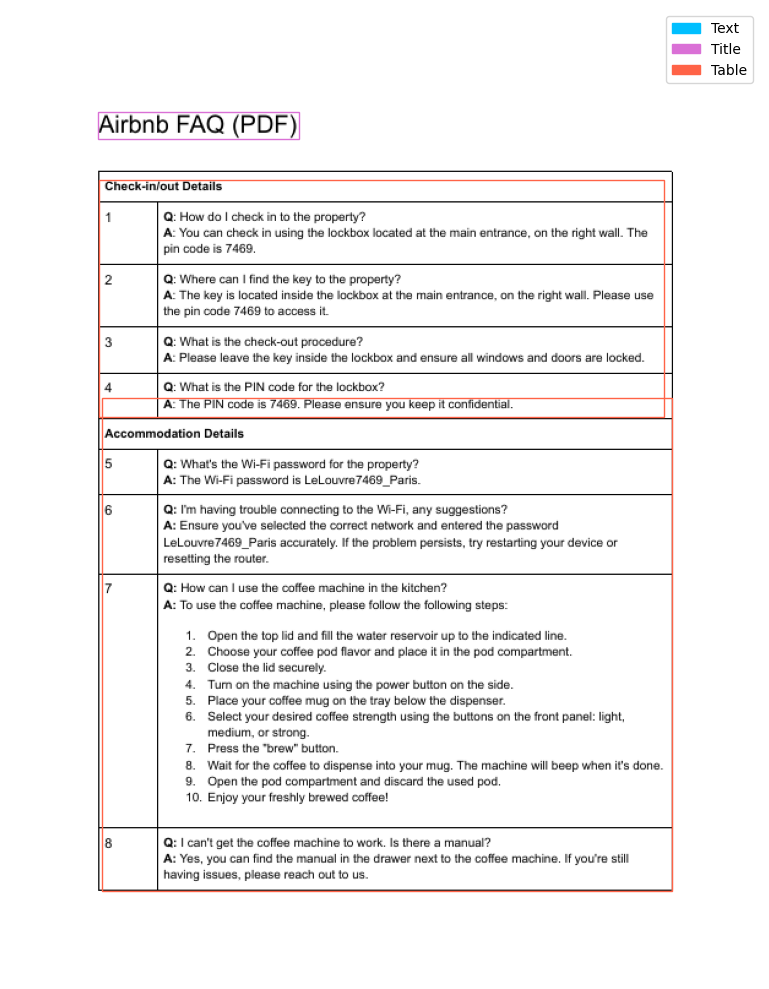

Airbnb FAQ (PDF)

Check-in/out Details 1 Q: How do I check in to the property? A: You can check in using the lockbox located at the main entrance, on the right wall. The pin code is 7469. 2 Q: Where can I find the key to the property? A: The key is located inside the lockbox at the main entrance, on the right wall. Please use the pin code 7469 to access it. 3 Q: What is the check-out procedure? A: Please leave the key inside the lockbox and ensure all windows and doors are locked. 4 Q: What is the PIN code for the lockbox? A: The PIN code is 7469. Please ensure you keep it confidential.

A: The PIN code is 7469. Please ensure you keep it confidential. Accommodation Details 5 Q: What's the Wi-Fi password for the property? A: The Wi-Fi password is LeLouvre7469_Paris. 6 Q: I'm having trouble connecting to the Wi-Fi, any suggestions? A: Ensure you've selected the correct network and entered the password LeLouvre7469_Paris accurately. If the problem persists, try restarting your device or r

In [15]:
render_page(docs, 1)

In [ ]:
# %pip install -qU PyMuPDF pillow langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [18]:
import base64
import io

import fitz
from PIL import Image


def pdf_page_to_base64(pdf_path: str, page_number: int):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_number - 1)  # input is one-indexed
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    buffer = io.BytesIO()
    img.save(buffer, format="PNG")

    return base64.b64encode(buffer.getvalue()).decode("utf-8")

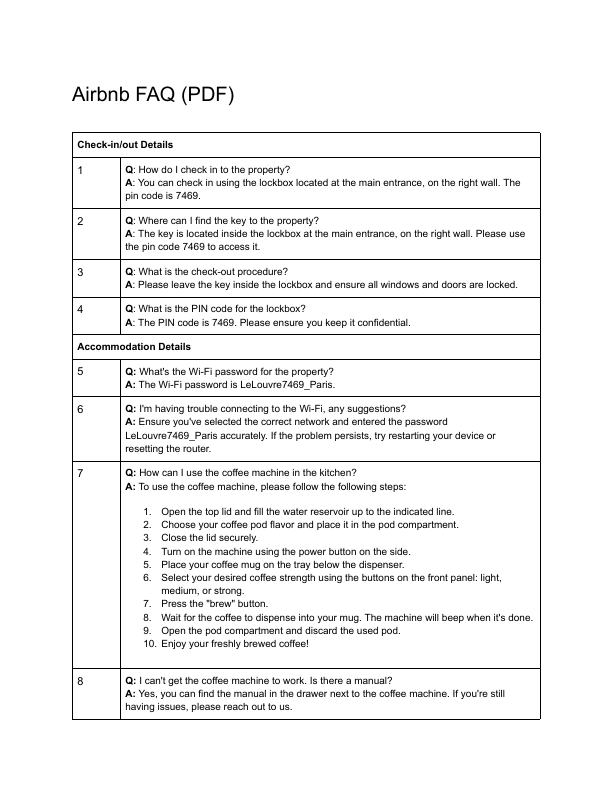

In [20]:
from IPython.display import Image as IPImage
from IPython.display import display

base64_image = pdf_page_to_base64(file_path, 1)
display(IPImage(data=base64.b64decode(base64_image)))

In [21]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

- Example

In [22]:
from langchain_core.messages import HumanMessage

query = "Where is the manual of the coffee machine?"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)
response = llm.invoke([message])
print(response.content)

INFO: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The manual for the coffee machine is located in the drawer next to the coffee machine. If you have any issues, you can reach out for assistance.
